# INTRO: Ejercicio EDA Visual Covid
Ejercicio para afianzar los conceptos básicos de EDA (Exploratory Data Analysis) Visual utilizando datos sobre la evolución del Covid.





# 01 Import
Importamos todas las librerías necesarias para este análisis ([¿No sabes lo que es una librería de Python?](https://www.quora.com/What-is-a-Python-library-and-what-can-I-use-it-for)).

Incluye pandas, numpy, matplotlib y seaborn.

In [ ]:
# 17:47
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 02 Load Data
Recordemos, hemos visto 3 maneras de importar datos en Colab:

*   Importar una tabla desde Github
*   Cargar (y luego importar) una tabla de nuestro local
*   Importar una tabla de Google Drive

### 0201 Importa dataframe Covid-19
Os he dejado en mi Google Drive:
*   [este archivo](https://drive.google.com/file/d/1s7KH9Zke0b862uFtoGYZI2gEKgJPDDTY/view?usp=sharing) con casos Covid-19 confirmados para ciertos países.
*   [este archivo](https://drive.google.com/drive/u/0/folders/1r-Qm0wF70NmWnUrZzVpjodBc2rT0lIPq) con muertes por Covid-19 confirmadas para esos mismos países.

Para cada país, cada tabla contiene contiene:

*   X: Los casos o fallecimientos (respectivamente) confirmados acumulados en el país X
*   X_REL: Los casos o fallecimientos (respectivamente) confirmados acumulados en el país X por cada 100.000 habitantes.
*   X_ult7: Los casos o fallecimientos (respectivamente) confirmados en los últimos 7 días en el país X.
*   X_REL_ult7: Los casos o fallecimientos (respectivamente) confirmados en los últimos 7 días en el país X por cada 100.000 habitantes.

Importa los datos del Covid como prefieras en dos dataframes: **df_casos_covid** y **df_muertes_covid** y modifica en ambos casos la columna fecha para que esté en un formato de tipo fecha.

In [ ]:
# Primero emparejamos Colab con Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importamos el archivo casos
#dir_archivo = '/content/drive/My Drive/Data/Clases/Covid_Casos_Clean.csv'
df_casos_covid = pd.read_csv("https://raw.githubusercontent.com/ssillerom/modulo_analisis_exploratorio/main/data/Covid_Casos_Clean.csv")
df_casos_covid.head()

,Date,China,France,Germany,Italy,Portugal,Spain,UK,US,China_REL,...,UK_ult7,US_ult7,China_REL_ult7,France_REL_ult7,Germany_REL_ult7,Italy_REL_ult7,Portugal_REL_ult7,Spain_REL_ult7,UK_REL_ult7,US_REL_ult7
0,2020-01-22,NaN,0,0,0,0,0,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,NaN,0,0,0,0,0,0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,NaN,2,0,0,0,0,0,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,NaN,3,0,0,0,0,0,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,NaN,3,0,0,0,0,0,5,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Importamos el archivo muertes
#dir_archivo = '/content/drive/My Drive/Data/Clases/Covid_Muertes_Clean.csv'
df_muertes_covid = pd.read_csv('https://raw.githubusercontent.com/ssillerom/modulo_analisis_exploratorio/main/data/Covid_Muertes_Clean.csv')
df_muertes_covid.head()

,Date,China,France,Germany,Italy,Portugal,Spain,UK,US,China_REL,...,UK_ult7,US_ult7,China_REL_ult7,France_REL_ult7,Germany_REL_ult7,Italy_REL_ult7,Portugal_REL_ult7,Spain_REL_ult7,UK_REL_ult7,US_REL_ult7
0,2020-01-22,NaN,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-01-23,NaN,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-01-24,NaN,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2020-01-25,NaN,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2020-01-26,NaN,0,0,0,0,0,0,0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Cambiamos el formato de la columna 'Date' en ambos archivos
df_casos_covid['Date'] = pd.to_datetime(df_casos_covid['Date'], format='%Y-%m-%d')
df_muertes_covid['Date'] = pd.to_datetime(df_muertes_covid['Date'], format='%Y-%m-%d')

# 02 Comprobaciones básicas
Comprueba el tamaño y variables de ambos dataframes.

Son iguales?

In [ ]:
# Tamaño
df_casos_covid.shape, df_muertes_covid.shape

((1063, 33), (1063, 33))

In [ ]:
# Hay alguna columna en el dataframe de casos no presente en el de muertes?
set(df_casos_covid.columns)-set(df_muertes_covid.columns)

set()

# 03 Crea dataframe tasa mortalidad
Puesto que los dataframes son iguales (en cuanto a forma) podemos hacer operaciones con ellos.

Crea un nuevo dataframe **df_tasa_mortalidad** que sea el resultado de dividir el dataframe con los fallecimientos entre el dataframe con el número de casos. Además, ten en cuenta:
*   Las tasas de mortalidad no tienen tanto sentido para los últimos 7 días, ni tiene sentido el resultado de dividir las cifras en términos relativos, por lo que nos cargamos todas esas variables.
*   Rellenamos también los nulos con 0.
*   Convertimos las tasas de mortalidad en porcentajes con dos cifras decimales XX.XX%

In [ ]:
# Con qué columnas nos vamos a quedar
display(df_casos_covid.columns)

cols = ['China', 'France', 'Germany', 'Italy', 'Portugal', 'Spain', 'UK', 'US']

Index(['Date', 'China', 'France', 'Germany', 'Italy', 'Portugal', 'Spain',
       'UK', 'US', 'China_REL', 'France_REL', 'Germany_REL', 'Italy_REL',
       'Portugal_REL', 'Spain_REL', 'UK_REL', 'US_REL', 'China_ult7',
       'France_ult7', 'Germany_ult7', 'Italy_ult7', 'Portugal_ult7',
       'Spain_ult7', 'UK_ult7', 'US_ult7', 'China_REL_ult7', 'France_REL_ult7',
       'Germany_REL_ult7', 'Italy_REL_ult7', 'Portugal_REL_ult7',
       'Spain_REL_ult7', 'UK_REL_ult7', 'US_REL_ult7'],
      dtype='object')

In [ ]:
# Generamos el dataframe df_tasa_mortalidad dividiendo el de muertes/casos
# La columna Fecha no se puede dividir entre otra columna Fecha
df_tasa_mortalidad = df_muertes_covid[cols]/df_casos_covid[cols]
df_tasa_mortalidad.head()

,China,France,Germany,Italy,Portugal,Spain,UK,US
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0
3,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0
4,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
# Ahora añadimos la columna fecha
df_tasa_mortalidad.insert(0, 'Date', df_casos_covid['Date'])
df_tasa_mortalidad.head()

,Date,China,France,Germany,Italy,Portugal,Spain,UK,US
0,2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,2020-01-24,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0
3,2020-01-25,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0
4,2020-01-26,NaN,0.0,NaN,NaN,NaN,NaN,NaN,0.0


In [ ]:
# Convertimos los nulls en 0s
df_tasa_mortalidad = df_tasa_mortalidad.fillna(0)

# Convertimos las cifras en porcentajes
df_tasa_mortalidad[cols] = np.round(df_tasa_mortalidad[cols]*100,2)

# Visualizamos algunos registros
df_tasa_mortalidad.head()

,Date,China,France,Germany,Italy,Portugal,Spain,UK,US
0,2020-01-22,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 04 Visualiza la evolución de la tasa de mortalidad
Visualiza la evolución de la tasa de mortalidad para los distintos países, donde mostremos:
- La línea de España en amarillo (con doble grosor)
- La línea de China en rojo, la de UK en azul y la de US en negro

Es decir, genera [esta imagen](https://drive.google.com/file/d/1ovUlcKY-ZVR1rxR-70BoWAuhPqpGgE2v/view?usp=sharing).

In [ ]:
# Utilizamos seaborn para mejorar la estética
sns.set()

In [ ]:
diccionario_colores = {
    'Spain': 'yellow',
    'China': 'red',
    'UK': 'blue',
    'US': 'black'
}

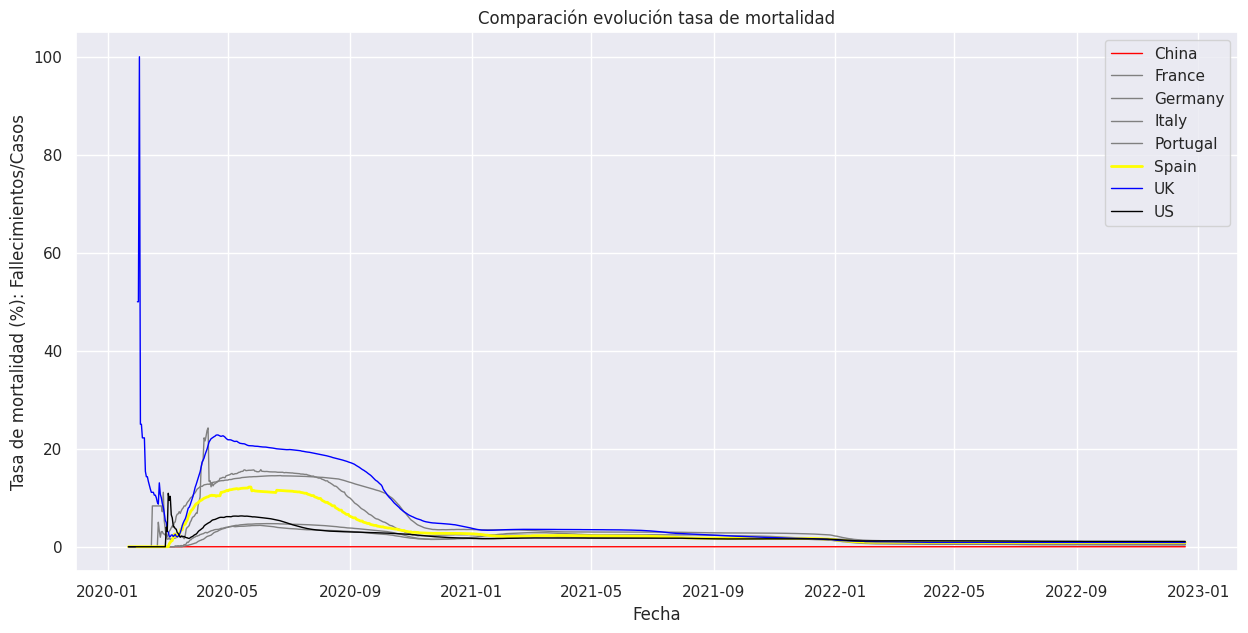

In [ ]:
# Generamos la imagen con la visualización
# Tamaño de la imagen (ancho, alto) (15,7)
plt.figure(figsize=(15, 7))

# Generamos el gráfico
for pais in cols:

  # Color
  if pais in list(diccionario_colores.keys()):
    color = diccionario_colores[pais]
  else:
    color = 'grey'

  # Grosor
  if pais == 'Spain':
    grosor = 2
  else:
    grosor = 1

  # Gráfico
  plt.plot(df_tasa_mortalidad['Date'], df_tasa_mortalidad[pais],
           color = color, linewidth = grosor, label = pais)

# Detalles de la imagen
plt.xlabel('Fecha')
plt.ylabel('Tasa de mortalidad (%): Fallecimientos/Casos')
plt.title('Comparación evolución tasa de mortalidad')
plt.legend()

plt.show()

## Reflexiona sobre el gráfico
- 1) Si la tasa de mortalidad es una buena medida del control de la enfermedad (o más bien del posible desborde de los servicios hospitalarios) quién la está controlando mejor?

- 2) Hay ciertos escalones en los datos, qué nos dice esto?

- 3) Explica los datos de China, por qué su curva tiene una forma distinta? Su tasa de mortalidad a día de hoy es la peor, por qué?

### 1) Si la tasa de mortalidad es una buena medida del control de la enfermedad (o más bien del posible desborde de los servicios hospitalarios) quién la está controlando mejor?

Probablemnte no haya una respuesta clara.

La tasa de mortalidad es:
muertes/casos

Una tasa alta se puede deber, por tanto:
A) A un numerador más alto de lo esperado en relación al denominador (más muertes de las esperables para cierto número de casos confirmados) quizás síntoma de una falta de capacidad en los sistemas sanitarios que provoca más fallecimientos.
B) A un denominador menor de lo esperado en relación al numerador (menos casos de los esperables para cierta cantidad de muertes) quizás síntoma de una falta de capacidad para diagnosticar casos.

En la primera ola es probable que B fuera la responsable, en gran medida, del aumento en la tasa, con casos de A lamentablemente también probables en los peores momentos de la pandemia. Luego, a medida que aumentó la capacidad de los países para diagnosticar (aumenta el denominador) y disminuye la tasa hata converger para todos los países en valores cercanos.

US parece haber mantenido un nivel relativamente bajo en la tasa de mortalidad en todo momento pero todos los países han sufrido en mayor o menor medida un descontrol de la pandamia si atendemos a la tasa de mortalidad.

### 2) Hay ciertos escalones en los datos, qué nos dice esto?
Los escalones, sobre todo presentes en China y España, hablan de la mala calidad de los datos, que se corrigen a posteriori.

### 3) Explica los datos de China, por qué su curva tiene una forma distinta? Su tasa de mortalidad a día de hoy es la peor, por qué?

China ha sufrido una subida en la tasa de mortalidad debido al descontrol en la primera ola que sufrieron todos lo países, como se explica en la primera pregunta. Luego, la ausencia casi total de casos desde entonces impide que aumente el denominador y por tanto que se corrija la tasa como sí ocurre en el resto de países.

# 05 Visualiza la Tasa de Mortalidad VS Otras Métricas
Con el mismo código de colores que en el anterior ejercicio, genera una imagen (fig) con 3 gráficos (ax) -en una sola columna- donde se visualice respectivamente:
- Fallecimientos relativos últimos 7 días
- Casos Confirmados relativos últimos 7 días
- Tasa de Mortalidad

Es decir, genera [esta imagen](https://drive.google.com/file/d/16SYlqCZ5NQ1S1JZpwR1J-Tq8-FGWysIO/view?usp=sharing).

In [ ]:
b

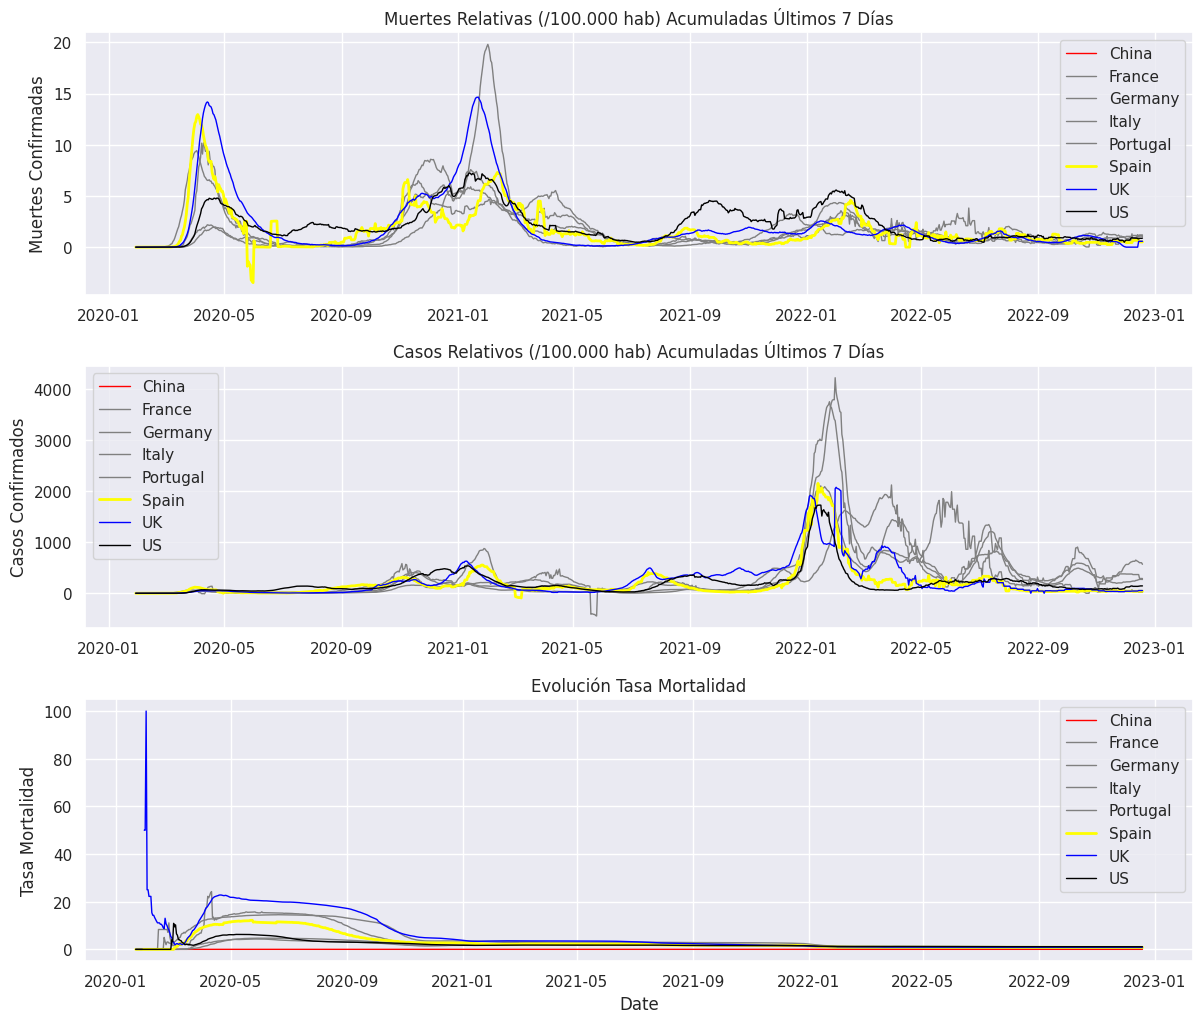

In [ ]:
b
plt.show()

## Reflexiona sobre el gráfico
- 1) Qué explica la evolución de la tasa de mortalidad en España (subida, seguida de una meseta, y una paulatina bajada)?
- 2) Se aprecia un retardo entre las muertes y los casos?


### 1) Qué explica la evolución de la tasa de mortalidad en España (subida, seguida de una meseta, y una paulatina bajada)?
El proceso explicado en el ejercicio anterior. Una primera ola descontrolado seguido de futuras olas más controladas.

### 2) Se aprecia un retardo entre las muertes y los casos?
Sí, se aprecia visualmente cómo los picos de las olas suceden más tarde en la evolución de las muertes que en la de casos confirmados.

# 06 Comparar Tasas de Mortalidad
Comparemos las tasas de mortalidad acumulada en 3 días específicos:
- 1 de abril de 2020
- 1 de julio de 2020
- último día disponible

Muéstralos utilizando 3 gráficos (ax) de barras horizontales en una sola figura, con los 3 gráficos en una sola fila.

Es decir, genera [esta imagen](https://drive.google.com/file/d/1q-GVmf_R5VR7s6DmEQWxAE7Dv8xEoKH1/view?usp=sharing).


In [ ]:
# Creamos tres variables con los días
dia_1_abril = pd.to_datetime('20200401', format='%Y/%m/%d')
dia_1_julio = pd.to_datetime('20200701', format='%Y/%m/%d')
ult_dia = df_casos_covid['Date'].iloc[-1]

ValueError: time data "20200401" doesn't match format "%Y/%m/%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

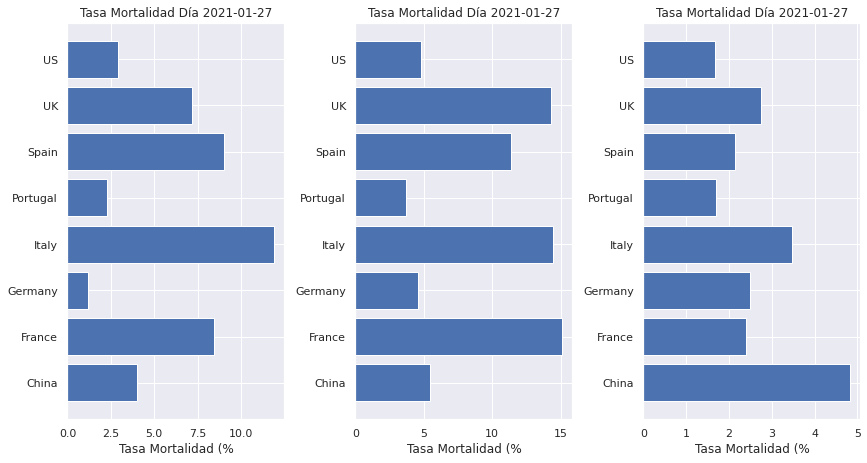

In [ ]:
# Genero los 3 ax en una variable
fig, ax = plt.subplots(nrows=1, ncols=3)
fig.tight_layout(pad=0)
fig.set_size_inches(12,6)

for i, dia in enumerate([dia_1_abril, dia_1_julio, ult_dia]):
  # Filtro
  filtro_dia = df_tasa_mortalidad['Date'] == dia

  # Serie valores
  serie_dia = df_tasa_mortalidad.loc[filtro_dia, cols].iloc[0,:]

  # Gráfico
  ax[i].barh(y = serie_dia.index, width = serie_dia.values)
  ax[i].set(title='Tasa Mortalidad Día '+str(ult_dia)[:10],
            xlabel='Tasa Mortalidad (%')

plt.show()